# __Original notebook can be found here:__ https://www.kaggle.com/code/moh3we5/traffic-sign-dataset-resnet-classification

# Import Libraries

In [5]:
import os
import glob
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory

tf.random.set_seed(42)
np.random.seed(42) 

# Load the Data

### __NOTE__: ImageDataGenerator is __depricated__

## Train Data

In [6]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.8, horizontal_flip=True, rescale=1/255, validation_split=0.2)

In [8]:
# base_path = os.path.basename('images')
train_path = os.path.join('data', 'traffic_Data', 'TRAIN')

data_train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    seed = 1234,
    shuffle = True,
    subset='training') # set as training data

data_val_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    seed = 1234,
    shuffle = True,
    subset='validation') # set as validation data


FileNotFoundError: [Errno 2] No such file or directory: 'data/traffic_Data/TRAIN'

# Load the Data V2

### __NOTE__: image_dataset_from_directory is more up to data data loader

In [20]:
data_train_gen = image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear'
)


data_val_gen = image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear'
)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [4]:
data_train_gen.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '46': 41,
 '47': 42,
 '48': 43,
 '49': 44,
 '5': 45,
 '50': 46,
 '51': 47,
 '52': 48,
 '53': 49,
 '54': 50,
 '55': 51,
 '56': 52,
 '57': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57}

## Test Data

In [5]:
all_images = []
for img_path in glob.glob("images/traffic_Data/TEST/*"):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0  # divide by 255.0 to get float values between 0 and 1 (Rescale)
    all_images.append(img_array)

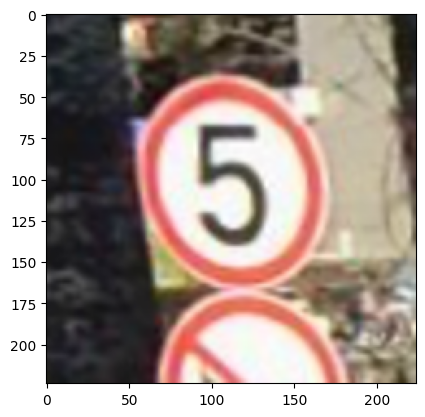

In [6]:
plt.imshow(all_images[40])

# Import the Model

In [7]:
ResNet50_model = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3)
                  )

2024-05-25 18:37:21.507242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-25 18:37:21.523145: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-25 18:37:21.523292: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Model Architecture

In [8]:
print(ResNet50_model.trainable)
ResNet50_model.trainable = False
print(ResNet50_model.trainable)

True
False


In [9]:
# ResNet50_model.summary()

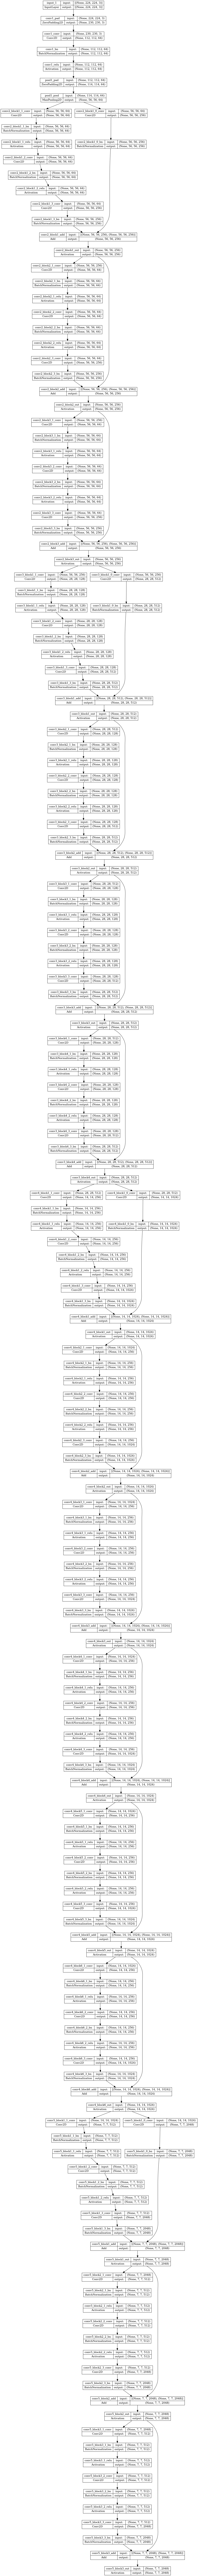

In [9]:
plot_model(ResNet50_model, to_file= 'ResNet50_model.png', show_shapes = True, show_layer_names=True)

In [10]:
# Transfer Learning
flatten_layer1 = Flatten()(ResNet50_model.output)
final_layer = Dense(len(data_train_gen.class_indices),activation='Softmax')(flatten_layer1)

In [11]:
model=Model(inputs=ResNet50_model.input,outputs=final_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# plot_model(model, to_file= 'model.png', show_shapes = True, show_layer_names=True)

In [13]:
for layer in model.layers:
    print(f'{layer} is trainable: {layer.trainable}')

<keras.engine.input_layer.InputLayer object at 0x738330b59180> is trainable: False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x738330b597b0> is trainable: False
<keras.layers.convolutional.conv2d.Conv2D object at 0x738330b39720> is trainable: False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x738330b5a530> is trainable: False
<keras.layers.core.activation.Activation object at 0x738330b5b490> is trainable: False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x738330b5bbe0> is trainable: False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x738330a7d0f0> is trainable: False
<keras.layers.convolutional.conv2d.Conv2D object at 0x738330a7edd0> is trainable: False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x738330a7fd90> is trainable: False
<keras.layers.core.activation.Activation object at 0x738330a7d510> is trainable: False
<keras.layers.convolutional.conv2d.Conv2D object

In [14]:
len(model.trainable_weights)

2

# Model training

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model_training = model.fit(data_train_gen, epochs=10, validation_data=data_val_gen)

Epoch 1/10


2024-05-25 18:38:51.298063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-05-25 18:38:52.451999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-05-25 18:38:52.718050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-25 18:38:53.069467: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x977aef70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-25 18:38:53.069484: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-05-25 18:38:53.087719: I

105/105 [==============================] - ETA: 0s - loss: 11.7258 - accuracy: 0.1667

2024-05-25 18:39:06.857584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


105/105 [==============================] - 19s 167ms/step - loss: 11.7258 - accuracy: 0.1667 - val_loss: 4.8551 - val_accuracy: 0.1788
Epoch 2/10
105/105 [==============================] - 16s 156ms/step - loss: 4.3479 - accuracy: 0.2953 - val_loss: 3.7601 - val_accuracy: 0.3588
Epoch 3/10
105/105 [==============================] - 16s 155ms/step - loss: 4.0666 - accuracy: 0.3852 - val_loss: 4.3795 - val_accuracy: 0.4365
Epoch 4/10
105/105 [==============================] - 16s 157ms/step - loss: 3.7751 - accuracy: 0.4314 - val_loss: 3.5665 - val_accuracy: 0.4513
Epoch 5/10
105/105 [==============================] - 17s 157ms/step - loss: 3.8933 - accuracy: 0.4272 - val_loss: 3.8618 - val_accuracy: 0.4340
Epoch 6/10
105/105 [==============================] - 17s 158ms/step - loss: 4.0721 - accuracy: 0.4469 - val_loss: 4.3863 - val_accuracy: 0.4710
Epoch 7/10
105/105 [==============================] - 17s 157ms/step - loss: 3.1690 - accuracy: 0.4981 - val_loss: 3.1099 - val_accuracy: 0.

# History

In [17]:
# History
pd.DataFrame(model_training.history)

,loss,accuracy,val_loss,val_accuracy
0,11.725763,0.166716,4.855107,0.178792
1,4.347931,0.295326,3.760093,0.358816
2,4.066586,0.385234,4.379544,0.436498
3,3.775123,0.431378,3.566539,0.451295
4,3.893322,0.427210,3.861771,0.434032
5,4.072062,0.446859,4.386338,0.471023
6,3.168958,0.498065,3.109892,0.482121
7,3.161700,0.497767,3.314826,0.561036
8,3.269687,0.503721,2.361813,0.581998
9,2.813199,0.561774,3.375058,0.484587


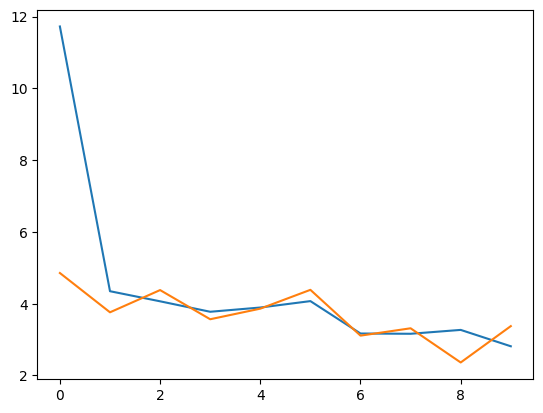

In [18]:
# Plot the Losses
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])

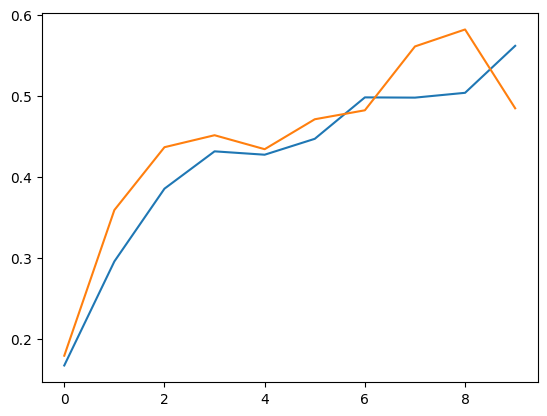

In [19]:
# Plot the Losses
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])

# Save the Model

In [ ]:
# model.save('Traffic_ResNet50_94%.h5')